In [26]:
import pandas as pd
from google.colab import files
import numpy as np

In [27]:
upload = files.upload()

Saving Train_Data.csv to Train_Data (1).csv
Saving Test_Data.csv to Test_Data (1).csv


In [28]:
train_data = pd.read_csv('Train_Data.csv')
test_data = pd.read_csv('Test_Data.csv')
print(train_data.head())
test_data.head()

   Unnamed: 0                                            reviews  \
0         930  was very disappointed. i paid an extra £500 fo...   
1        1105  service as expected for price. full flight fro...   
2         333  cabin crew were very pleasant and helpful. eve...   
3        1290  outdated, unclean and uncomfortable. london to...   
4         144  short-changing passengers. ba is not treating ...   

   Review Sentiment Sentiment  
0           -0.7215  Negative  
1           -0.3105   Neutral  
2            0.9695  Positive  
3           -0.8774  Negative  
4            0.4404   Neutral  


,Unnamed: 0,reviews,Review Sentiment,Sentiment
0,28,service was fantastic. credit to ba - flew to ...,0.9768,Positive
1,248,"total disruption, wasted time. the incoming an...",-0.9263,Negative
2,562,service on the same route is becoming worse. y...,-0.9287,Negative
3,370,i have not received my refund. refund process ...,0.2942,Neutral
4,736,a remarkably bad experience. london to vancouv...,-0.8950,Negative


In [29]:
train_data.drop(columns = 'Unnamed: 0', inplace = True)
test_data.drop(columns = 'Unnamed: 0', inplace = True)
train_data.head()

,reviews,Review Sentiment,Sentiment
0,was very disappointed. i paid an extra £500 fo...,-0.7215,Negative
1,service as expected for price. full flight fro...,-0.3105,Neutral
2,cabin crew were very pleasant and helpful. eve...,0.9695,Positive
3,"outdated, unclean and uncomfortable. london to...",-0.8774,Negative
4,short-changing passengers. ba is not treating ...,0.4404,Neutral


**TF-IDF for Text features**

Fitting on training dataset

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(train_data['reviews'])



In [31]:
X_train_tfidf

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 75515 stored elements and shape (854, 5000)>

Saving this Vectorizer for furture usage.

Doing it using joblib library.

In [32]:
import joblib

joblib.dump(tfidf, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']

Transforming the testing data to the same max_features as it should cause mismatch

In [ ]:
X_test_tfidf = tfidf.transform(test_data['reviews'])

In [ ]:
y_train = train_data['Review Sentiment']

**RandomForestRegressor**

It’s an ensemble learning algorithm that builds multiple decision trees and averages their predictions. It’s like asking a group of different experts and then combining their opinions.

Why:
1. Handles Text-Based Feature Vectors Well (Like TF-IDF)
2. Captures Complex Patterns
3. Robust to Noise and Irrelevant Features

Source:
https://scikit-learn.org/1.6/modules/generated/sklearn.ensemble.RandomForestRegressor.html


In [ ]:
from sklearn.ensemble import RandomForestRegressor


model = RandomForestRegressor(n_estimators=100, random_state=42) #There are 100 trees in this model
model.fit(X_train_tfidf, y_train)


RandomForestRegressor(random_state=42)

In [ ]:
y_pred = model.predict(X_test_tfidf)

In [ ]:
y_pred

array([ 6.44443e-01, -4.64729e-01, -5.33290e-01, -2.43423e-01,
       -2.35830e-01,  8.15950e-01, -5.59278e-01, -1.60000e-03,
       -5.40298e-01,  3.22132e-01,  5.11850e-01,  7.25691e-01,
       -4.13111e-01,  8.64634e-01, -4.87122e-01, -2.08664e-01,
       -4.59460e-02,  3.73465e-01, -3.16781e-01,  1.96168e-01,
        7.32654e-01,  4.48250e-02,  1.47330e-02, -6.74242e-01,
       -5.57880e-02,  5.34128e-01,  7.73646e-01, -5.57975e-01,
        4.49320e-01, -2.83604e-01,  8.01267e-01,  6.47843e-01,
       -1.05066e-01,  2.99471e-01,  1.61990e-02,  6.33224e-01,
       -3.21455e-01,  8.46451e-01, -3.11056e-01, -1.38319e-01,
        7.27563e-01,  1.15945e-01, -4.49290e-01,  7.74309e-01,
       -2.11264e-01,  1.95578e-01, -4.10508e-01, -4.21596e-01,
       -4.41315e-01,  5.21509e-01, -3.65226e-01,  5.97790e-01,
       -3.06670e-02, -3.56070e-01, -4.41904e-01, -3.13919e-01,
        7.12751e-01, -3.05071e-01, -7.41929e-01, -2.21152e-01,
       -3.22866e-01, -4.48878e-01,  3.07677e-01, -4.410

In [ ]:
test_data['Predicted_Score'] = y_pred
test_data.head()

,reviews,Review Sentiment,Sentiment,Predicted_Score
0,service was fantastic. credit to ba - flew to ...,0.9768,Positive,0.644443
1,"total disruption, wasted time. the incoming an...",-0.9263,Negative,-0.464729
2,service on the same route is becoming worse. y...,-0.9287,Negative,-0.533290
3,i have not received my refund. refund process ...,0.2942,Neutral,-0.243423
4,a remarkably bad experience. london to vancouv...,-0.8950,Negative,-0.235830


In [ ]:
y_test = test_data['Review Sentiment']

**Finding the errors**

Source: https://scikit-learn.org/stable/api/sklearn.metrics.html

In [ ]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 0.510226286885246


In [ ]:
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_test, y_pred)
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 0.406581711100276


**Scatterplot between Actual and Predicted Satisfaction Scores**

Source: ChatGPT

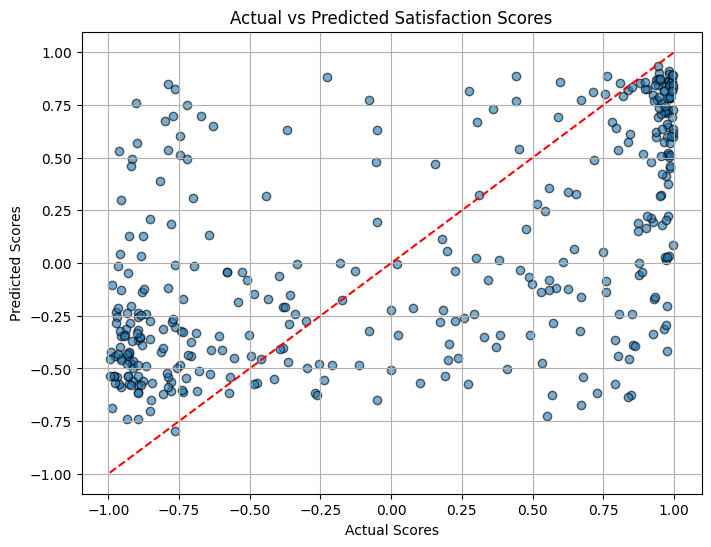

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolors='k')
plt.xlabel("Actual Scores")
plt.ylabel("Predicted Scores")
plt.title("Actual vs Predicted Satisfaction Scores")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.grid(True)
plt.show()

In [ ]:
test = test_data['Predicted_Score'].to_numpy()
test_data['Predicted_Sentiment'] = np.select([test_data['Predicted_Score'] <= -0.5, test_data['Predicted_Score']>=0.5], ['Negative','Positive'], 'Neutral')
test_data


,reviews,Review Sentiment,Sentiment,Predicted_Score,Predicted_Sentiment
0,service was fantastic. credit to ba - flew to ...,0.9768,Positive,0.644443,Positive
1,"total disruption, wasted time. the incoming an...",-0.9263,Negative,-0.464729,Neutral
2,service on the same route is becoming worse. y...,-0.9287,Negative,-0.533290,Negative
3,i have not received my refund. refund process ...,0.2942,Neutral,-0.243423,Neutral
4,a remarkably bad experience. london to vancouv...,-0.8950,Negative,-0.235830,Neutral
...,...,...,...,...,...
361,best short haul flight. madrid to london ba045...,0.9892,Positive,0.602524,Positive
362,abysmal service. at copenhagen the most chaoti...,0.1015,Neutral,-0.571026,Negative
363,it was a nightmare. they changed our flights f...,-0.8055,Negative,-0.401027,Neutral
364,service level far worse then ryanair. 4 hours ...,-0.9342,Negative,-0.433416,Neutral


In [ ]:
print(test_data['Sentiment'].value_counts().sort_index())
print((test_data['Predicted_Sentiment'].value_counts()).sort_index() )

Sentiment
Negative    142
Neutral      76
Positive    148
Name: count, dtype: int64
Predicted_Sentiment
Negative     59
Neutral     203
Positive    104
Name: count, dtype: int64


**Saving the model locally**

Using joblib library, I am saving the model locally for future usage.

Source : https://www.kaggle.com/code/rhythmcam/save-and-load-model-with-joblib

In [ ]:
import joblib


joblib.dump( model, 'random_forest_model.pkl')

['random_forest_model.pkl']